# TP N°1 : Perceptron mono-couche


[link text](https://) Réalisé par :
            
          
              Habib Achref RT4/1
        


# Objectif :

# I. Travail à faire :

# 1. Algorithme :

# 1.1 Complexité en temps

# 1.2 Complexité en espace

# 2. Dataset :

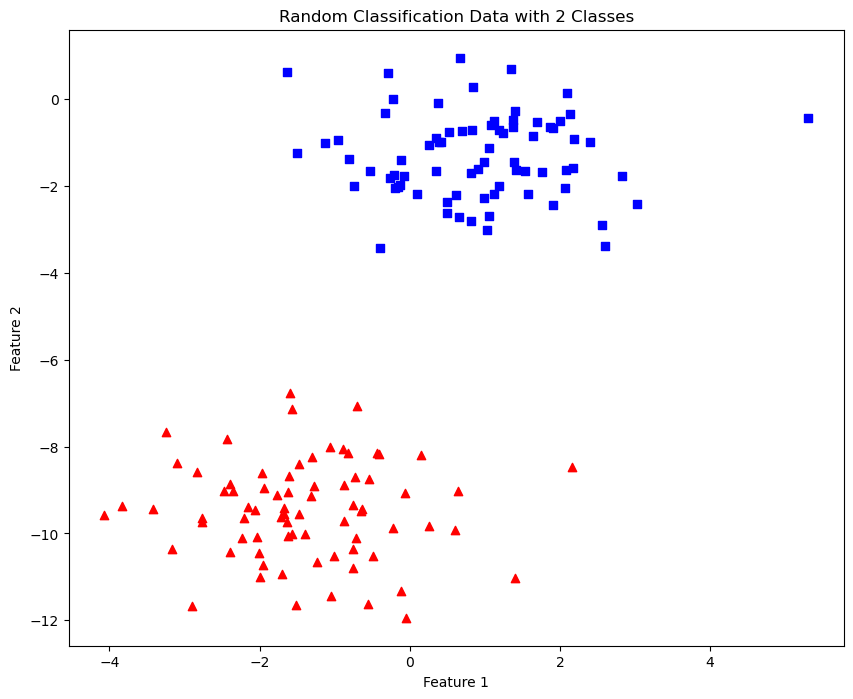

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt  # Corrected import

# Generating synthetic data
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
#n_samples=150 : Le nombre total d'échantillons générés dans l'ensemble de données est de 150.
#n_features=2 : Chaque échantillon aura 2 caractéristiques (dimensions).
#centers=2 : Le nombre total de classes (clusters) dans les données générées sera de 2.
#cluster_std=1.05 : L'écart type des clusters générés. Un écart type plus élevé entraînera des clusters plus dispersés.
#random_state=2 : les résultats resteront toujours identiques, même si je vais exécuter le code plusieurs fois.

# Plotting
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='^', color='red')  # Changed from plt.plot to plt.scatter for clarity
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='s', color='blue')  # Changed from plt.plot to plt.scatter for clarity
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Random Classification Data with 2 Classes')
plt.show()  # This line will display the plot

# 3. Implémentation :

# Coder la fonction d’activation de Heaviside :


In [ ]:
def acti_func(z):
    return 1 if z > 0 else 0

# Implementer l’algorithme de perceptron

In [ ]:
import numpy as np

def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> Learning rate.
    # epochs --> Number of iterations.

    m, n = X.shape  # m-> number of training examples, n-> number of features

    # Initializing weights (parameters) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1, 1)) #vecteur de poids de dimension (n+1,1)

    # Empty list to store the number of examples that were misclassified at every iteration.
    n_miss_list = []

    # Training process
    for epoch in range(epochs):
        # Variable to store the count of misclassified examples
        n_miss = 0 #On crée une liste vide pour stocker le nombre d'exemples mal classés à chaque itération.

        # Looping through every example
        for idx, x_i in enumerate(X):
            # Inserting 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)

            # Calculating prediction/hypothesis using the activation function.
            y_hat = acti_func(np.dot(x_i.T, w)) #On calcule le produit scalaire entre x_i et w, puis on applique la fonction d'activation acti_func.

            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0: #np.squeeze(y_hat) rend y_hat un scalaire
                # Update rule for weights w = w + learning_rate * (y[i] - y_hat) * x_i
                w += lr * (y[idx] - np.squeeze(y_hat)) * x_i

                # Incrementing by 1 when there is a misclassified example.
                n_miss += 1

        # Appending number of misclassified examples at every iteration to the list.
        n_miss_list.append(n_miss)

    return w, n_miss_list


In [ ]:
perceptron(X,y,0.00001,2)

(array([[1.00000000e-04],
        [1.48859540e-05],
        [1.69384333e-05]]),
 [14, 0])

In [ ]:
perceptron(X,y,0.001,10)

(array([[0.01      ],
        [0.0014886 ],
        [0.00169384]]),
 [14, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Tracez la limite de décision trouvée par votre algorithme.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, w):
    # X --> Inputs
    # w --> Parameters (weights)

    # The Line is y = mx + c
    # Solving for m and c from w0 + w1*x1 + w2*x2 = 0 => X2 = -w[1]/w[2] * X[1] - w[0]/w[2]
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1] / w[2]
    c = -w[0] / w[2]

    # Calculating x2 values based on x1's range
    x2 = m * np.array(x1) + c

    # Plotting the Decision Boundary
    plt.plot(x1, x2, 'y-')  # y- is the color yellow with a solid line
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)  # Plot the raw data
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.show()

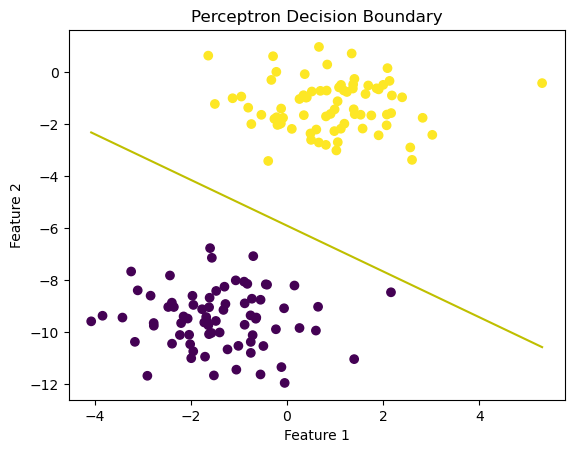

In [ ]:
w,n_miss_list=perceptron(X,y,0.001,2)
plot_decision_boundary(X, w)

# II. Exercice2

# 1. Dataset :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(42)
def CreateDataset(sigma1, sigma2):
  mu1 = np.array([-1, 0]) #Les coordonnées du centre de la première classe, ici [-1, 0].
  mu2 = np.array([1, 0]) #Les coordonnées du centre de la deuxième classe, ici [1, 0].

  class1_data = np.random.normal(mu1, sigma1, size=(125, 2)) #Génère 125 échantillons pour la première classe en utilisant une distribution normale centrée sur mu1 avec une variance de sigma1.
  class2_data = np.random.normal(mu2, sigma2, size=(125, 2)) #Génère 125 échantillons pour la deuxième classe en utilisant une distribution normale centrée sur mu2 avec une variance de sigma2.

  class1_labels = np.full((125,), -1) #Crée un tableau de 125 valeurs, toutes égales à -1, pour la première classe.
  class2_labels = np.full((125,), 1) #Crée un tableau de 125 valeurs, toutes égales à 0, pour la deuxième classe.

  X = np.vstack((class1_data, class2_data)) # Combine les données de class1_data et class2_data verticalement.
  y = np.concatenate((class1_labels, class2_labels)) #Concatène les étiquettes de class1_labels et class2_labels.

  return X,y

# 2. Implémentation :

# Expérience 1

In [ ]:
# Génération du dataset
X, y = CreateDataset(sigma1=0.25, sigma2=0.25)

indices = np.arange(len(X))
np.random.shuffle(indices)

X_shuffled = X[indices]
y_shuffled = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

print("Dimensions de l'ensemble d'entraînement X :", X_train.shape)
print("Dimensions de l'ensemble de test X :", X_test.shape)
print("Dimensions de l'ensemble d'entraînement y :", y_train.shape)
print("Dimensions de l'ensemble de test y :", y_test.shape)



Dimensions de l'ensemble d'entraînement X : (200, 2)
Dimensions de l'ensemble de test X : (50, 2)
Dimensions de l'ensemble d'entraînement y : (200,)
Dimensions de l'ensemble de test y : (50,)


# Data Visualisation

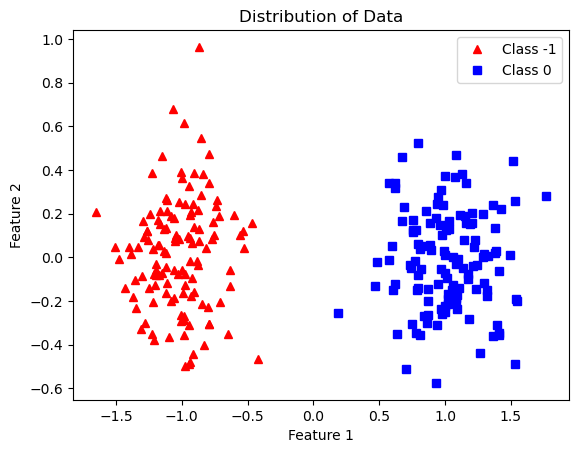

In [ ]:
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^', label='Class -1')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 0')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Distribution of Data')

plt.legend()
plt.show()

In [ ]:
def perceptron(X, y, lr=0.0001, epochs=100, early_stopping=False):
  m, n = X.shape
  w = np.zeros((n+1,1))
  n_miss_list = []

  # Training.
  for epoch in range(epochs):
    n_miss = 0

    for idx, x_i in enumerate(X):
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      y_hat = np.sign((np.dot(x_i.T, w)))

      if (np.squeeze(y_hat) - y[idx]) != 0:
        w += lr * np.squeeze(y[idx] - y_hat) * x_i
        n_miss +=1

    n_miss_list.append(n_miss)

    ## Model Converged
    if early_stopping:
      if n_miss == 0:
        print(f'\n[!] Model converged in epoch: {epoch}')
        break
 #early_stopping : C'est un mécanisme qui arrête l'entraînement si la performance du modèle ne s'améliore pas sur un ensemble
#de validation pendant un certain nombre d'itérations. Il permet d'éviter le surapprentissage et économiser du temps et des ressources
  return w, n_miss_list


In [ ]:
w,n_miss_list  = perceptron(X_train,y_train, early_stopping=True)
print (w,n_miss_list)


[!] Model converged in epoch: 1
[[ 0.0001    ]
 [ 0.00039329]
 [-0.00013662]] [3, 0]


# Decision Boundary

In [ ]:
def plot_decision_boundary(w,X=X_train,y=y_train):
    # X --> Inputs
    # w --> Parameters (weights)

    # The Line is y = mx + c
    # Solving for m and c from w0 + w1*x1 + w2*x2 = 0 => X2 = -w[1]/w[2] * X[1] - w[0]/w[2]
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1] / w[2]
    c = -w[0] / w[2]

    # Calculating x2 values based on x1's range
    x2 = m * x1 + c

    # Plotting the Decision Boundary
    plt.plot(x1, x2, 'y-')  # y- is the color yellow with a solid line
    plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^', label='Class -1')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 0')  # Plot the raw data
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.ylim([-1,1])
    plt.title("Perceptron Decision Boundary")
    plt.show()

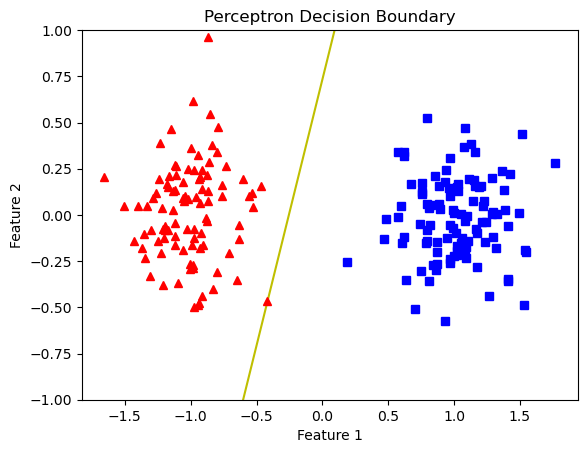

In [ ]:
plot_decision_boundary(w)

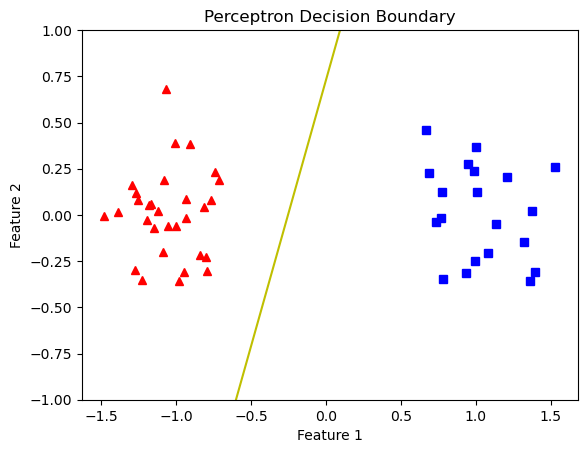

In [ ]:
plot_decision_boundary(w,X_test,y_test)

# Effet de l'initialisation

In [ ]:
def perceptron1(X, y, lr=0.0001, epochs=10000, early_stopping=False):
  m, n = X.shape
  w = np.random.rand(n+1,1)
  n_miss_list = []

  # Training.
  for epoch in range(epochs):
    n_miss = 0

    for idx, x_i in enumerate(X):
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      y_hat = np.sign((np.dot(x_i.T, w)))

      if (np.squeeze(y_hat) - y[idx]) != 0:
        w += lr * np.squeeze(y[idx] - y_hat) * x_i
        n_miss +=1

    n_miss_list.append(n_miss)

    ## Model Converged
    if early_stopping:
      if n_miss == 0:
        print(f'\n[!] Model converged in epoch: {epoch}')
        break
 #early_stopping : C'est un mécanisme qui arrête l'entraînement si la performance du modèle ne s'améliore pas sur un ensemble
#de validation pendant un certain nombre d'itérations. Il permet d'éviter le surapprentissage et économiser du temps et des ressources
  return w, n_miss_list

In [ ]:
w,n_miss_list  = perceptron1(X_train,y_train, early_stopping=True)
print (w,n_miss_list)


[!] Model converged in epoch: 285
[[0.37830537]
 [0.9751793 ]
 [0.46668901]] [12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


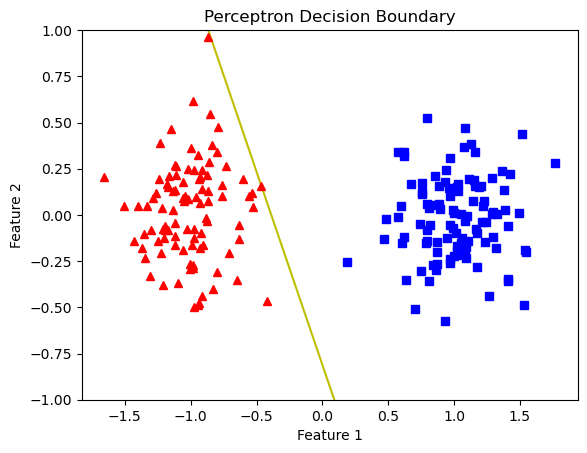

In [ ]:
plot_decision_boundary(w)

# Accuracy

In [ ]:
from tqdm import tqdm
def accuracy(X=X_test,y=y_test,w=w):
  n_miss = [] #Liste vide pour suivre si chaque exemple est correctement classé ou non.
  for idx, x_i in tqdm(enumerate(X_test)):
    x_i = np.insert(x_i, 0, 1).reshape(-1,1) #Ajout de biais= 1
    y_hat = np.sign(np.dot(x_i.T, w))  #np.sign retourne -1 ou 1 selon le signe de la prédiction.
    if (np.squeeze(y_hat) - y_test[idx]) != 0:
      n_miss.append(0)
    else:
      n_miss.append(1)

  n_miss = np.array(n_miss)
  acc = np.where(n_miss==1)[0].shape[0] / n_miss.shape[0] * 100
 #Compte le nombre d'exemples correctement classés (np.where(n_miss == 1)[0].shape[0]).
#Divise par le nombre total d'exemples et multiplie par 100 pour obtenir un pourcentage.
  print(f'\nAcc: {acc:.2f} %')

In [ ]:
w,n_miss_list = perceptron(X_train, y_train, early_stopping=True)
accuracy()


[!] Model converged in epoch: 1


50it [00:00, 24977.99it/s]


Acc: 100.00 %


# Expérience 2 :

In [ ]:
# Génération du dataset
X2, y2 = CreateDataset(sigma1=0.75, sigma2=0.75)

indices = np.arange(len(X2))
np.random.shuffle(indices)

X2_shuffled = X[indices]
y2_shuffled = y[indices]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_shuffled, y2_shuffled, test_size=0.2, random_state=42)

print("Dimensions de l'ensemble d'entraînement X :", X2_train.shape)
print("Dimensions de l'ensemble de test X :", X2_test.shape)
print("Dimensions de l'ensemble d'entraînement y :", y2_train.shape)
print("Dimensions de l'ensemble de test y :", y2_test.shape)

Dimensions de l'ensemble d'entraînement X : (200, 2)
Dimensions de l'ensemble de test X : (50, 2)
Dimensions de l'ensemble d'entraînement y : (200,)
Dimensions de l'ensemble de test y : (50,)


# Data Visualisation

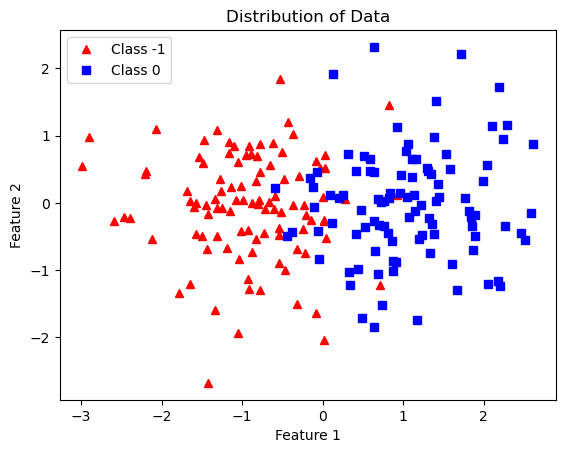

In [ ]:
plt.plot(X2_train[:, 0][y2_train == -1], X2_train[:, 1][y2_train == -1], 'r^', label='Class -1')
plt.plot(X2_train[:, 0][y2_train == 1], X2_train[:, 1][y2_train == 1], 'bs', label='Class 0')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Distribution of Data')

plt.legend()
plt.show()

In [ ]:
w2,n_miss_list2  = perceptron(X2_train,y2_train,epochs=10000, early_stopping=True)
print (w2,n_miss_list2)

[[1.00000000e-04]
 [4.24093943e-04]
 [3.47890353e-07]] [22, 18, 20, 20, 24, 20, 18, 22, 20, 24, 18, 22, 20, 20, 20, 22, 19, 17, 20, 20, 20, 18, 22, 20, 24, 18, 20, 20, 22, 19, 19, 20, 20, 20, 18, 22, 20, 24, 18, 22, 20, 20, 20, 22, 19, 17, 20, 20, 20, 22, 18, 20, 20, 20, 24, 21, 17, 22, 20, 20, 20, 20, 24, 21, 17, 22, 20, 20, 20, 20, 22, 18, 20, 20, 22, 19, 17, 20, 20, 18, 20, 20, 22, 19, 17, 20, 20, 20, 18, 22, 20, 24, 18, 22, 20, 20, 20, 22, 19, 17, 20, 20, 20, 22, 18, 20, 20, 20, 24, 21, 17, 22, 20, 20, 20, 20, 22, 18, 20, 20, 22, 19, 17, 20, 20, 18, 20, 20, 22, 19, 17, 20, 20, 20, 18, 22, 20, 24, 18, 22, 20, 20, 20, 22, 19, 17, 20, 20, 20, 22, 18, 20, 20, 20, 24, 21, 17, 22, 20, 20, 20, 20, 22, 18, 20, 20, 22, 19, 17, 20, 20, 18, 20, 20, 22, 19, 17, 20, 20, 20, 18, 22, 20, 24, 18, 22, 20, 20, 20, 22, 19, 17, 20, 20, 20, 22, 18, 20, 20, 20, 24, 21, 17, 22, 20, 20, 20, 20, 22, 18, 20, 20, 22, 19, 17, 20, 20, 20, 18, 22, 20, 24, 18, 22, 20, 20, 20, 22, 19, 17, 20, 20, 20, 18, 22, 20, 

# Decision Boundary

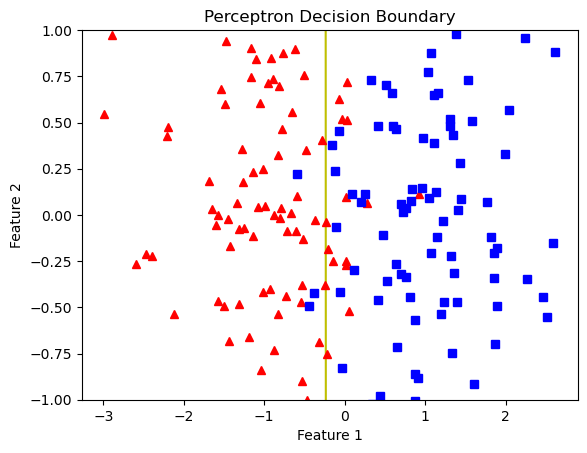

In [ ]:
plot_decision_boundary(w2,X=X2_train,y=y2_train)

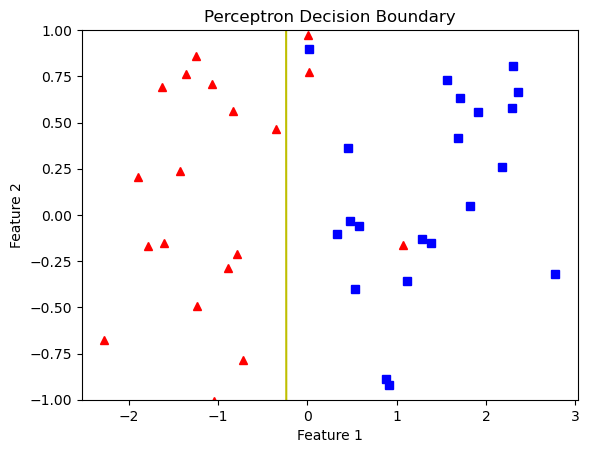

In [ ]:
plot_decision_boundary(w2,X=X2_test,y=y2_test)

# Effet de l'initialisation

In [ ]:
w3,n_miss_list3  = perceptron1(X2_train,y2_train, early_stopping=True)
print (w3,n_miss_list3)

[[0.0001119 ]
 [0.00042217]
 [0.00012508]] [62, 62, 60, 61, 61, 60, 59, 56, 55, 54, 52, 51, 50, 50, 47, 47, 46, 46, 46, 45, 45, 44, 44, 41, 41, 41, 41, 41, 40, 38, 38, 36, 36, 36, 36, 37, 36, 35, 34, 33, 32, 31, 31, 31, 31, 30, 30, 30, 30, 30, 29, 28, 27, 27, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 23, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 18, 17, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 18, 19, 18, 19, 19, 18, 

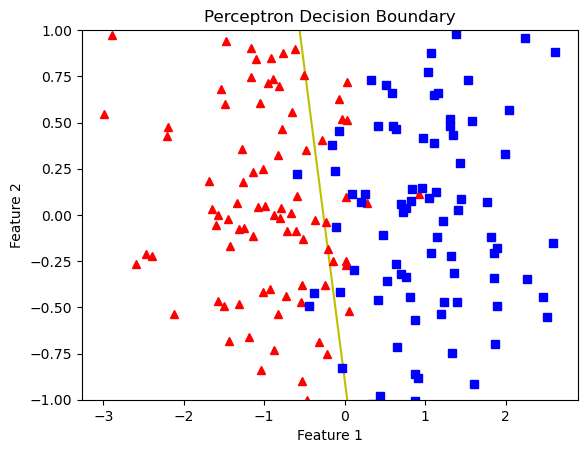

In [ ]:
plot_decision_boundary(w3,X=X2_train,y=y2_train)

# Accuracy

In [ ]:
w2,n_miss_list2 = perceptron(X2_train, y2_train, early_stopping=True)
accuracy(X2_test,y2_test,w2)

50it [00:00, 49967.88it/s]


Acc: 86.00 %


# Best Decision Boundary

In [ ]:
def Best_train_perceptron(X, y, lr=0.0001, epochs=100, return_best=True, w='Random'):
    # Initialiser les dimensions et les poids.
    m, n = X.shape
    if w == 'Random':
        w = np.random.rand(n + 1, 1)
    else:
        w = np.zeros((n + 1, 1))
    error_tracking = {}

    # Boucle d'entraînement.
    for epoch in range(epochs):
        errors = 0

        for index, X_i in enumerate(X):
            # Ajouter le biais à l'échantillon.
            X_i = np.insert(X_i, 0, 1).reshape(-1, 1)
            y_hat = np.sign(np.dot(X_i.T, w))

            # Mise à jour des poids en cas d'erreur de classification.
            if (np.squeeze(y_hat) - y[index]) != 0:
                w += lr * (y[index] - np.squeeze(y_hat)) * X_i
                errors += 1

        error_tracking[epoch] = {'Poids': w, 'erreur': errors}

    if return_best:
        # Sélectionner les poids avec le moins d'erreurs.
        best_epoch = min(error_tracking.items(), key=lambda x: x[1]['erreur'])
        best_weights = best_epoch[1]['Poids']
        min_errors = best_epoch[1]['erreur']

        return best_weights, min_errors

    return w, error_tracking


In [ ]:
# Entraînement du perceptron pour trouver les poids optimaux
best_w, min_misclassified = Best_train_perceptron(X2_train, y2_train, epochs=10000)

# Affichage des résultats
print(f'\nPoids qui minimisent le nombre d\'exemples mal classés :\n {best_w}')
print(f'Nombre d\'exemples mal classés :\n {min_misclassified}')



Poids qui minimisent le nombre d'exemples mal classés :
 [[4.75821990e-05]
 [5.03482472e-04]
 [1.65631487e-04]]
Nombre d'exemples mal classés :
 14


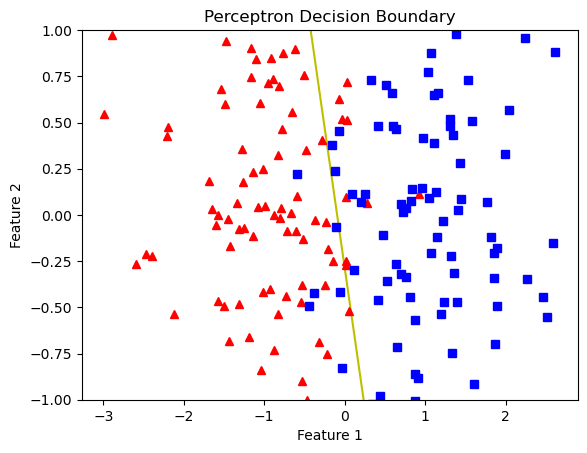

In [ ]:
plot_decision_boundary(best_w,X=X2_train,y=y2_train)

# Expérience 3 :

In [ ]:
def error_test(X=X_test,y=y_test,w=w):
#La fonction est conçue pour mesurer l'erreur d'un modèle en se basant sur les prédictions faites par un ensemble de poids
#w par rapport aux véritables étiquettes (y_test).
  n_miss = []

  for idx, x_i in enumerate(X_test):
    x_i = np.insert(x_i, 0, 1).reshape(-1,1)
    y_hat = np.sign(np.dot(x_i.T, w))
    if (np.squeeze(y_hat) - y_test[idx]) != 0:
      n_miss.append(0)
    else:
      n_miss.append(1)

  n_miss = np.array(n_miss)
  acc = np.where(n_miss==1)[0].shape[0] / n_miss.shape[0]
  return 1-acc

In [ ]:
def experiment(sigma1, sigma2, num_experiments=30):
    errors = []

    for _ in tqdm(range(num_experiments), desc=f'sigma={sigma1:.2f} '):
        # Création du Dataset, division en train/test
        X, y = CreateDataset(sigma1=sigma1, sigma2=sigma2)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Appliquer l'algorithme
        w, min_misclassified = Best_train_perceptron(X_train, y_train, epochs=100, w='zeros') # Initialisation zeros

        # Calcul des erreurs
        error = min_misclassified / y_test.shape[0]
        errors.append(error)

    # Calcul de la moyenne et de la variance des erreurs
    mean_error = np.mean(errors)
    error_variance = np.var(errors)

    return mean_error, error_variance


sigma=0.01 : 100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


mean: 0.0000, var: 0.0000



sigma=0.10 : 100%|██████████| 30/30 [00:20<00:00,  1.47it/s]


mean: 0.0000, var: 0.0000



sigma=0.50 : 100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


mean: 0.1073, var: 0.0031



sigma=0.70 : 100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


mean: 0.3393, var: 0.0075



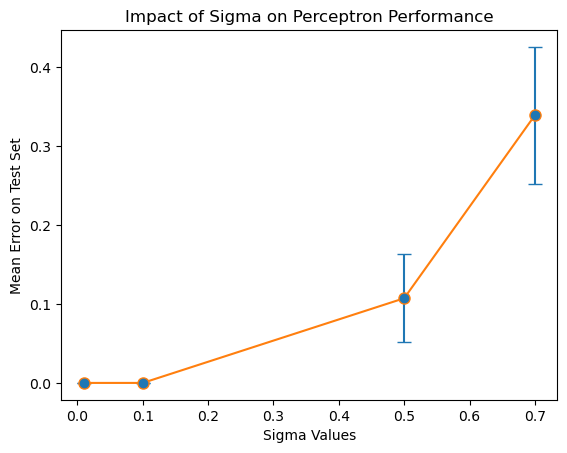

In [ ]:
sigma_values = [0.01, 0.1, 0.5, 0.7]
mean_errors = []
error_variances = []

for sigma_value in sigma_values:
    mean_error, error_variance = experiment(sigma_value, sigma_value)
    print(f'mean: {mean_error:.4f}, var: {error_variance:.4f}\n')
    mean_errors.append(mean_error)
    error_variances.append(error_variance)

# Plot the results using matplotlib.pyplot.errorbar
plt.errorbar(sigma_values, mean_errors, yerr=np.sqrt(error_variances), fmt='o', capsize=5)
plt.plot(sigma_values, mean_errors, linestyle='-', marker='o', markersize=8)

plt.xlabel('Sigma Values')
plt.ylabel('Mean Error on Test Set')
plt.title('Impact of Sigma on Perceptron Performance')
plt.show()

# Interprétation Globale :